In [1]:
import sys
from dotenv import load_dotenv, dotenv_values
load_dotenv("../cv19.env")
sys.path.append(dotenv_values("../cv19.env")["CV19ROOT"])

In [2]:
import pandas as pd

In [3]:
from cv19.simulation import simulation

In [4]:
# Initialize the simulation object
config_file = "../config_files/main.json"
sim = simulation(config_file, verbose=True)

In [5]:
# Run the simulation
sim.run()

Simulation code version (from git): v0.1.4-13-gea529b27474a-dirty

Day: 0, Lockdown: True
Day: 0, Testing: True
Day: 0, infected: 10, recovered: 0, susceptible: 9990, dead: 0, hospitalized: 0, ICU: 0, tested: 0, total quarantined: 0, infected students: 1, vaccinated: 0
Variants: general:10, alpha:0, delta:0, 

Day: 1, infected: 19, recovered: 0, susceptible: 9981, dead: 0, hospitalized: 1, ICU: 0, tested: 0, total quarantined: 0, infected students: 3, vaccinated: 0
Variants: general:19, alpha:0, delta:0, 

Day: 2, infected: 24, recovered: 0, susceptible: 9976, dead: 0, hospitalized: 1, ICU: 0, tested: 1, total quarantined: 0, infected students: 3, vaccinated: 0
Variants: general:24, alpha:0, delta:0, 

Day: 3, infected: 32, recovered: 0, susceptible: 9968, dead: 0, hospitalized: 1, ICU: 0, tested: 1, total quarantined: 0, infected students: 3, vaccinated: 0
Variants: general:32, alpha:0, delta:0, 

Day: 4, infected: 35, recovered: 0, susceptible: 9965, dead: 0, hospitalized: 1, ICU: 0,

Day: 41, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 364, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 42, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 404, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 43, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 404, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 44, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 446, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 45, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 446, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, d

Day: 82, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 1585, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 83, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 1585, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 84, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 1669, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 85, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 1669, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha:0, delta:0, 

Day: 86, infected: 0, recovered: 39, susceptible: 9961, dead: 0, hospitalized: 0, ICU: 0, tested: 1755, total quarantined: 0, infected students: 0, vaccinated: 0
Variants: general:0, alpha

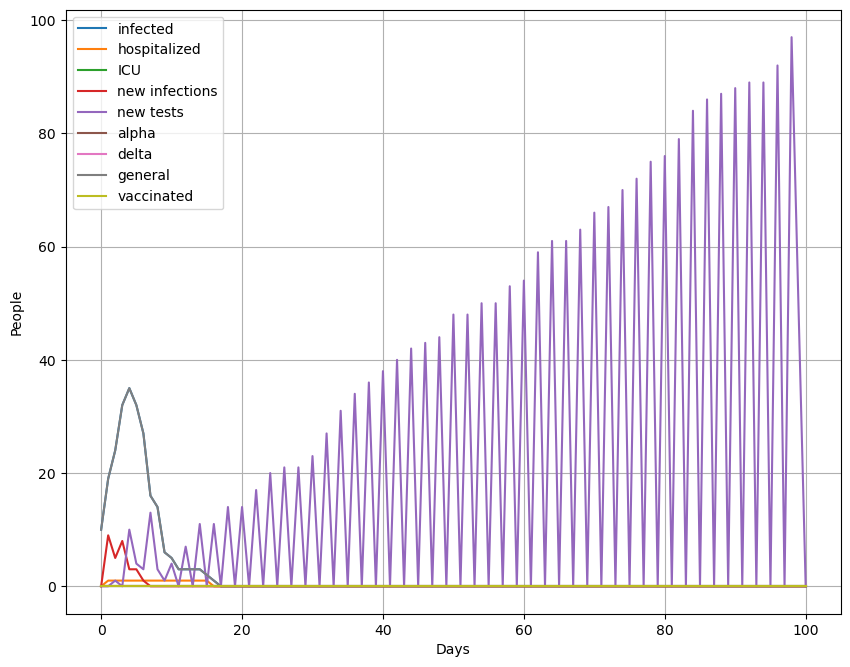

In [6]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":True, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":True, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":False, "plot_testing":False, "plot_students":False, 
            "plot_vaccinated":True, "plot_virus_types":{"alpha":True, "delta":True, "general":True},
            'log':False}        
sim.plot(**plot_kws)

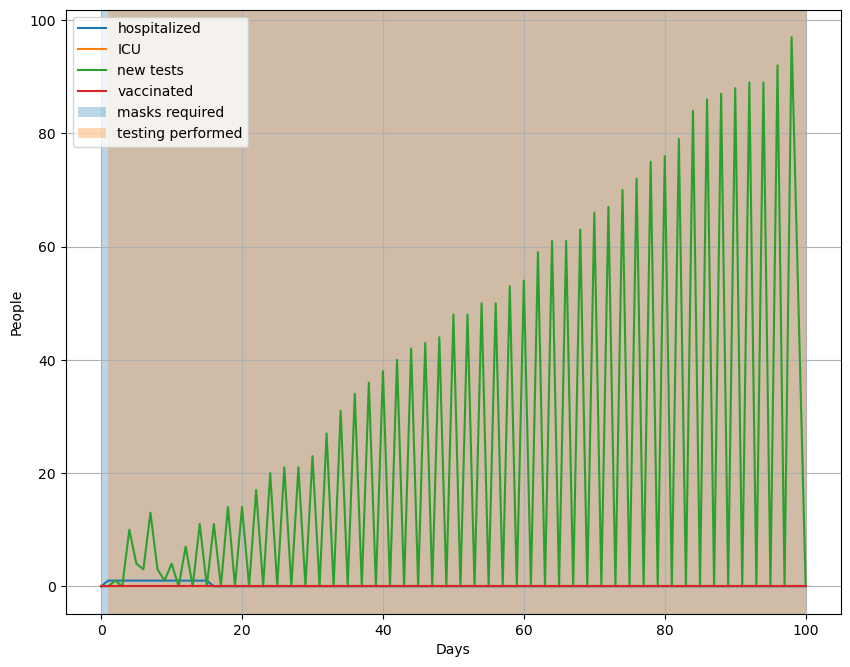

In [7]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":False, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":False, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":True, "plot_testing":True, "plot_students":False,
            "plot_vaccinated":True,
            'log':False}        
sim.plot(**plot_kws)

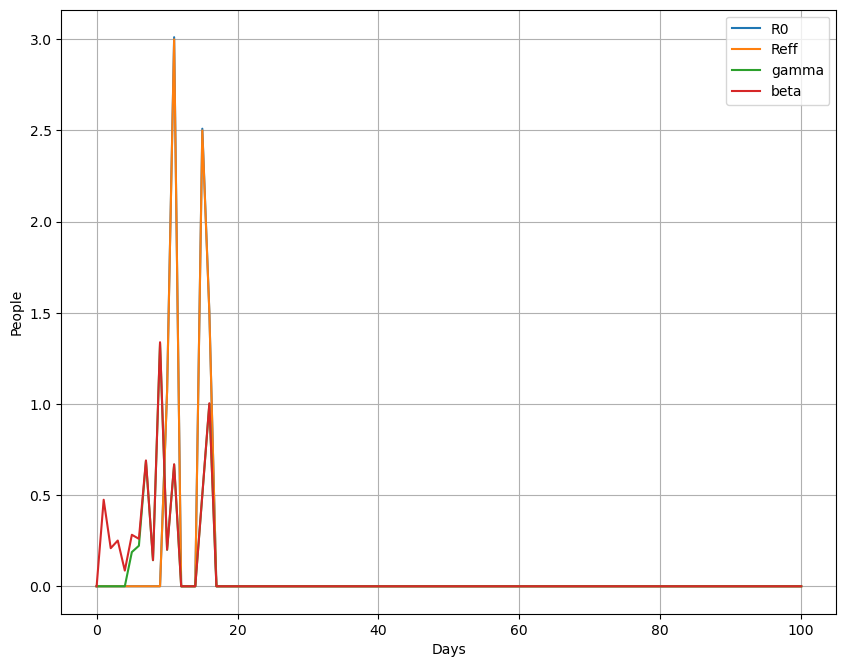

In [8]:
# Determine plot parameters and show the plot
import matplotlib.pyplot as plt
plot_kws = {"plot_gamma":True, "plot_beta":True, "plot_R_eff":True, "plot_R0": True, 
            "plot_lockdown":False, "plot_masks":True, 'log':False, "plot_infected":False, "plot_recovered":False, 
            "plot_dead":False, "plot_susceptible":False,"plot_new_infected":False, "plot_quarantined":False, 
            "plot_tested":False, "plot_lockdown":False, "plot_masks":False, "plot_testing":False, 
            "plot_students":False, "plot_vaccinated":False, "plot_new_tests": False, "plot_hospitalized": False,
            "plot_ICU": False,
            "plot_virus_types":{"alpha":False, "delta":False, "general":False}, 'log':False}               
sim.plot(**plot_kws)

In [9]:
# Example of how to access the raw data and convert to a pandas DataFrame.
raw_data = sim.get_arrays()
df = pd.DataFrame(raw_data)
df.index.rename('day', inplace=True)
df.head()

,infected,new_infected,recovered,susceptible,dead,quarantined,inf_students,total_tested,new_tested,hospitalized,...,masks_enforced,lockdown_enforced,time_elapsed,R0,Reff,HIT,vaccinated,general,alpha,delta
day,,,,,,,,,,,,,,,,,,,,,
0,10,0,0,9990,0,0,1,0,0,0,...,True,False,0.272246,0.0,0.0,0.0,0,10,0,0
1,19,9,0,9981,0,0,3,0,0,1,...,True,True,0.506043,0.0,0.0,0.0,0,19,0,0
2,24,5,0,9976,0,0,3,1,1,1,...,True,True,0.725730,0.0,0.0,0.0,0,24,0,0
3,32,8,0,9968,0,0,3,1,0,1,...,True,True,0.984916,0.0,0.0,0.0,0,32,0,0
4,35,3,0,9965,0,9,3,11,10,1,...,True,True,1.307207,0.0,0.0,0.0,0,35,0,0
